# **Restaurant's Cuisine Ratings Dataset / For EDA Analysis**

## **Project held by:** Aarish Asif Khan

## **Date:** 5/12/2024

---

# **About the Dataset:**

## **Context**
There's a story behind every dataset and here's your opportunity to share yours.

## **Content**
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

## **Acknowledgements**
Thanks to @AnirudhKalabande for sharing the data with me, who in turn sharing in the community.

## **Inspiration**

Some questions can be answered as:
* Q: Visualizing the food rating as per their origin in both the genders category
* Q: Comparison of services & preference rating etc. etc.
* Q: Visualizing on basis of other criteria such as marital status or profession the rating they give.

In [94]:
# Import libraries
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

In [95]:
# Load the following dataset
dataframe = pd.read_csv("./Data/Cuisine_rating.csv")

In [96]:
# Print 5 rows of the dataset
dataframe.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [97]:
# Check the shape of the dataset
dataframe.shape

(200, 15)

The dataset has 200 rows and 15 columns.

In [98]:
print("------------------------------------------------------")
print("Data Types:")
print("------------------------------------------------------")

# Check dtypes
print(dataframe.dtypes)

------------------------------------------------------
Data Types:
------------------------------------------------------
User ID             int64
Area code           int64
Location           object
Gender             object
YOB                 int64
Marital Status     object
Activity           object
Budget              int64
Cuisines           object
Alcohol            object
Smoker             object
Food Rating         int64
Service Rating      int64
Overall Rating    float64
Often A S          object
dtype: object


In [99]:
# Check Missing values 
dataframe.isnull().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

In [100]:
# Remove any unwanted cols
dataframe = dataframe.drop(["User ID", "Area code"], axis=1)

# Print 5 rows of the dataset
dataframe.head()

,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [101]:
# Check data info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        200 non-null    object 
 1   Gender          200 non-null    object 
 2   YOB             200 non-null    int64  
 3   Marital Status  200 non-null    object 
 4   Activity        200 non-null    object 
 5   Budget          200 non-null    int64  
 6   Cuisines        200 non-null    object 
 7   Alcohol         200 non-null    object 
 8   Smoker          200 non-null    object 
 9   Food Rating     200 non-null    int64  
 10  Service Rating  200 non-null    int64  
 11  Overall Rating  200 non-null    float64
 12  Often A S       200 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 20.4+ KB


In [102]:
# Check for unique values
dataframe.nunique()

Location          10
Gender             2
YOB               46
Marital Status     3
Activity           2
Budget             5
Cuisines           7
Alcohol            3
Smoker             3
Food Rating        5
Service Rating     5
Overall Rating     9
Often A S          2
dtype: int64

In [103]:
# Check duplicates
dataframe.duplicated().sum()

79

In [104]:
# Remove the duplicates
dataframe = dataframe.drop_duplicates()

In [105]:
dataframe.duplicated().sum()

0

In [109]:
# Group the data to figure out the median for Martial Status
martial_status = dataframe.groupby('Marital Status')['Food Rating'].median()
martial_status

Marital Status
Divorced    5.0
Married     3.0
Single      4.0
Name: Food Rating, dtype: float64

<Axes: xlabel='Marital Status'>

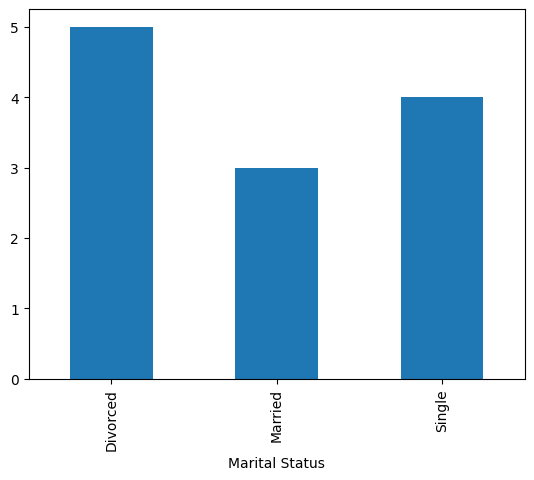

In [110]:
martial_status.plot(kind='bar',x='Marital Status')

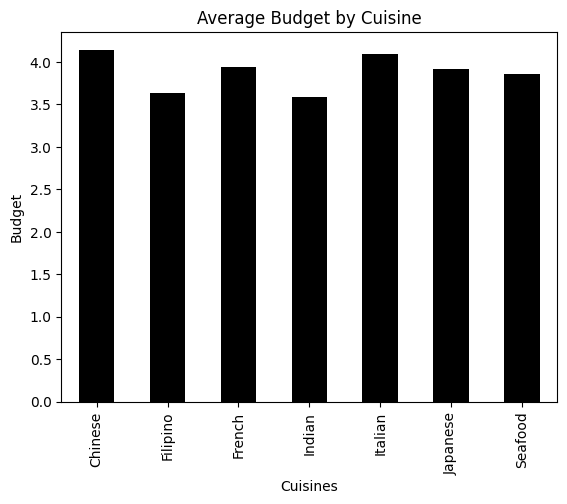

In [116]:
# Group by 'Cuisines' and calculate the mean of 'Budget'
cuisine = dataframe.groupby('Cuisines')['Budget'].mean()

# Plot the bar chart
cuisine.plot(kind='bar', color='black')
plt.xlabel('Cuisines')
plt.ylabel('Budget')
plt.title('Average Budget by Cuisine')
plt.show()

In [111]:
# Check classes of Cuisines
dataframe["Cuisines"].unique()

array(['Japanese', 'Indian', 'Seafood', 'Filipino', 'Italian', 'Chinese',
       'French'], dtype=object)

In [119]:
len(dataframe["Cuisines"].unique())

7

There are total 7 classes of Cuisines

<Axes: xlabel='Smoker', ylabel='count'>

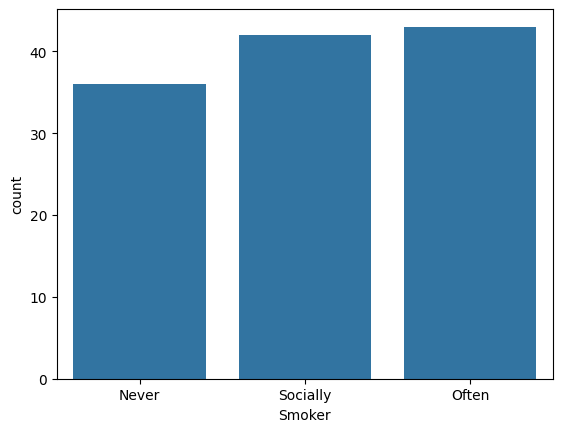

In [107]:
# Visualization of Smoker
sns.countplot(x="Smoker", data=dataframe)

From the plot above, we can estimate that around 55 - 60% do not smoke, 70% smoke socially and around 68 - 69% people smoke often.

# **Assumptions:**

1. The dataset has 200 rows
2. The dataset has 15 columns
3. The dtype of the dataset is mostly of int, float and objects
4. The unwanted columns in the dataset are User ID and Area Code
5. The dataset has 79 Duplicates
6. The dataset does not contain any Missing values
7. `Cuisines:` There are 7 classes of Cuisines, Japanese, Indian, Seafood, Filipino, Italian, Chinese and French
8. People with a budget around 3.5 and below tend to eat more Filipino and Italian foods
9. `Smoker:` Around 55 - 60% do not Smoke, 70% Smoke socially and around 68 - 70% people Smoke often
10. `Martial Status:` People divorced are 5.0, Married are 3.0 and Single people are 4.0
